<a href="https://colab.research.google.com/github/Shada97/Predicting-Salary/blob/main/Arabi_Shaghayegh_400551598_MLproject(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Loading the data

In [ ]:
df = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")

# Dividing salaries into categories

I am going to add a column to this dataset, indicating if the salary is higher than 100k in a year or not. In the end, our model is going to predict this column.

In [ ]:
df['salary_category'] = df['salary_in_usd'].apply(lambda x: 1 if x > 100000 else 0)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_category
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,0
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,0
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,0
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,1
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,1


# Data visualization

In [ ]:
!pip install country_converter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.3 MB/s eta 0:00:00


In [ ]:
import country_converter as coco
df1 = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
df1['company_location']=coco.convert(names=df1['company_location'], to='ISO3')
fig=px.choropleth(df1,
                  locations='company_location',
                  color='salary_in_usd',
title='Distribution of Employer Headquarters by Country')
fig.show()

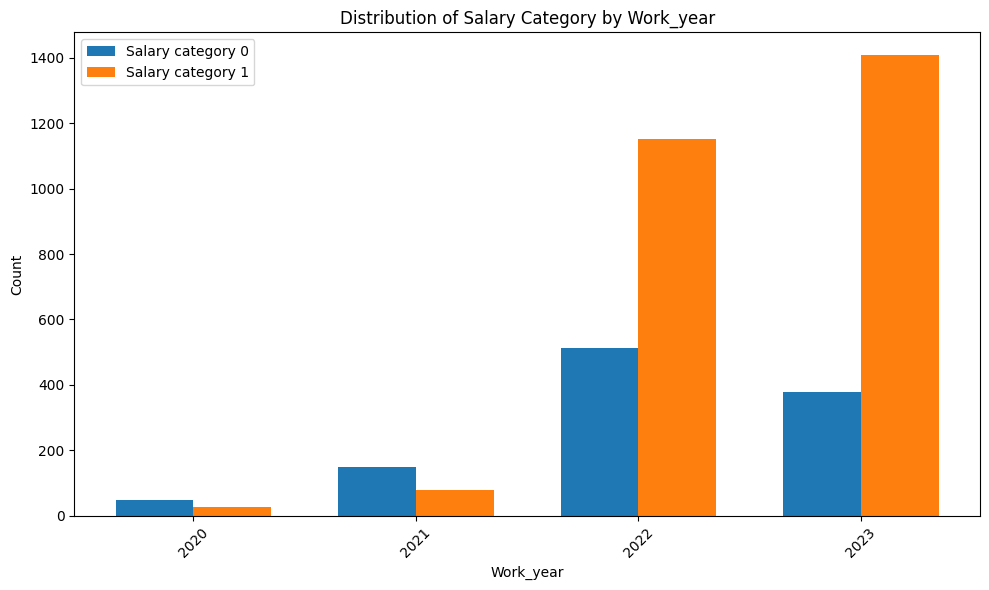

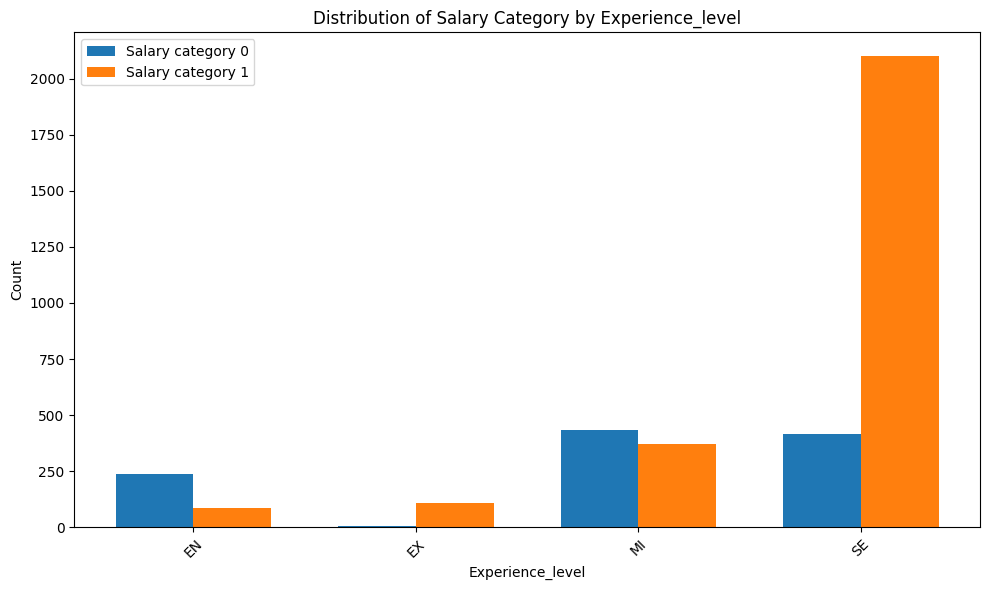

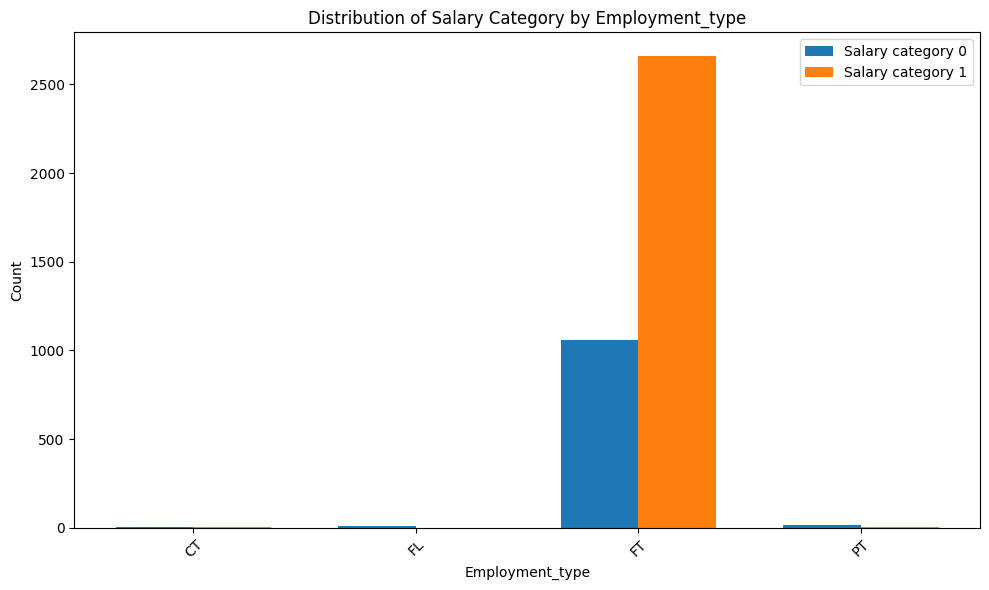

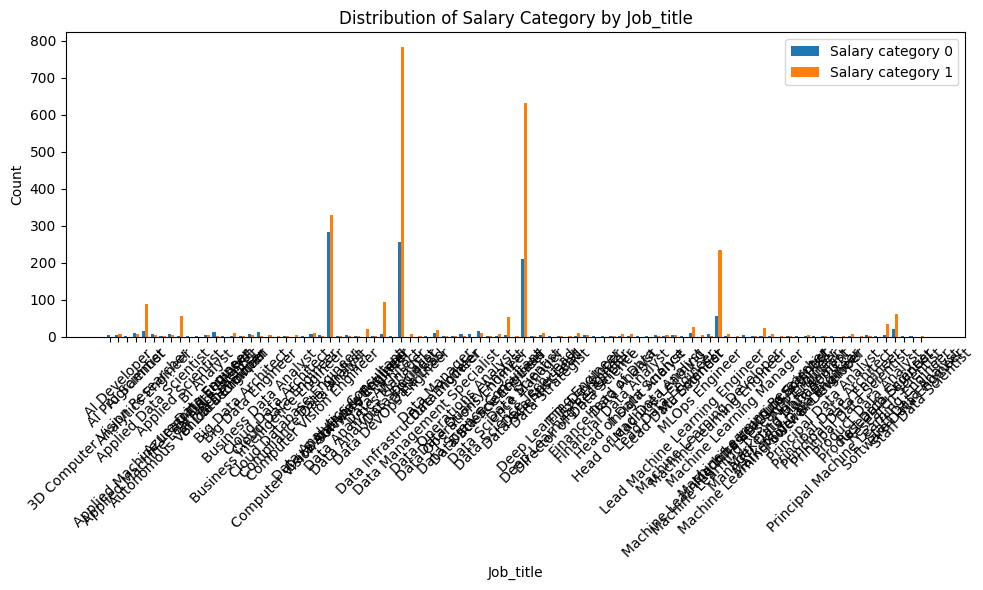

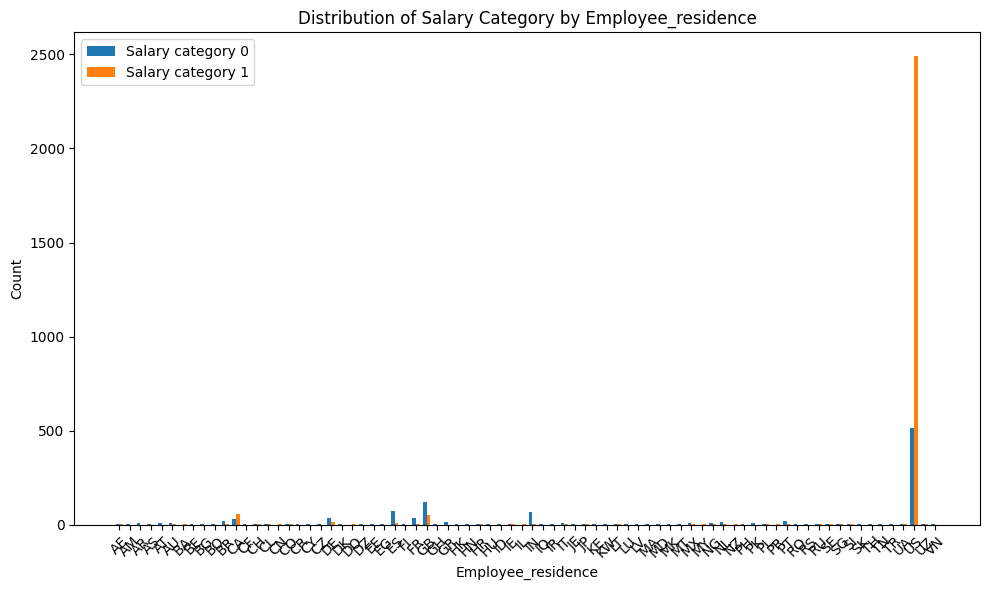

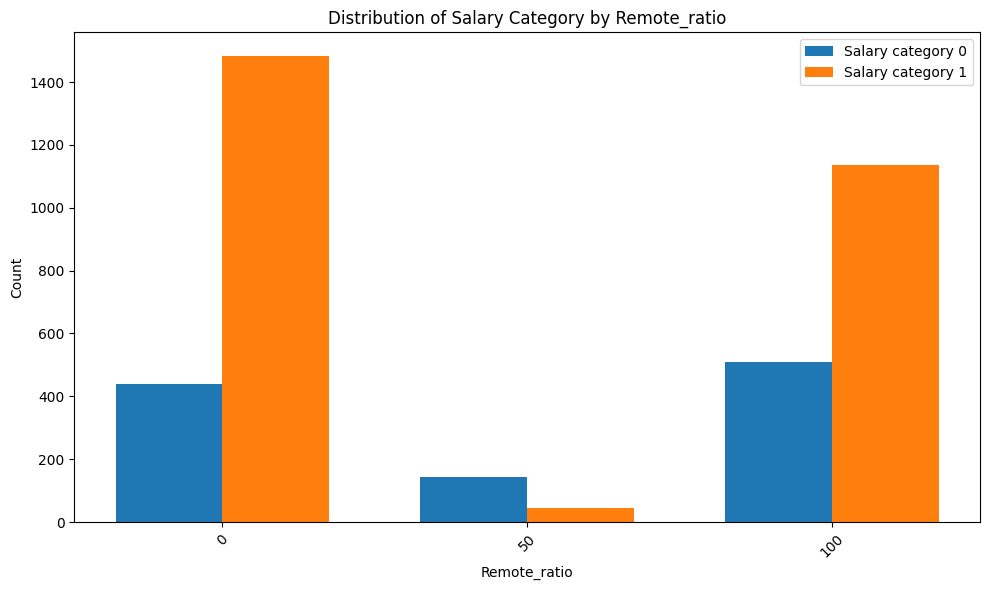

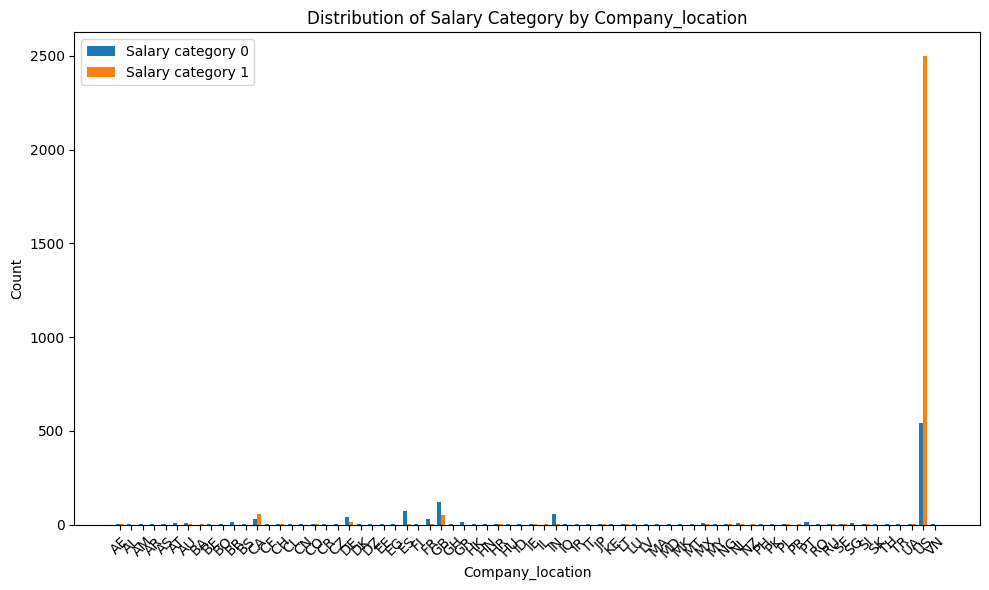

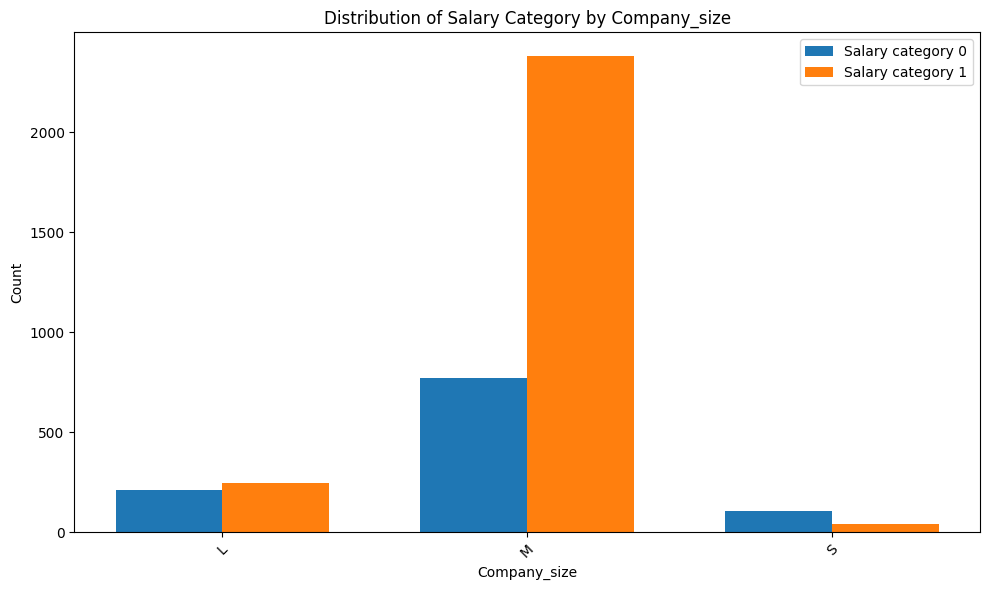

In [ ]:
variables = ['work_year', 'experience_level', 'employment_type', 'job_title',
             'employee_residence', 'remote_ratio', 'company_location', 'company_size']

for variable in variables:
    # Group the data by 'salary_category' and every other variable
    grouped_df = df.groupby(['salary_category', variable]).size().unstack(fill_value=0)

    counts_0 = grouped_df.loc[0].values
    counts_1 = grouped_df.loc[1].values

    width = 0.35

    xx = np.arange(len(grouped_df.columns))
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    plt.bar(xx - width/2, counts_0, width=width, label="Salary category 0")
    plt.bar(xx + width/2, counts_1, width=width, label="Salary category 1")
    plt.xticks(xx, grouped_df.columns, rotation=45)  # Rotate x-tick labels for better readability
    plt.xlabel(variable.capitalize())  # Set the x-axis label
    plt.ylabel('Count')  # Set the y-axis label
    plt.title(f'Distribution of Salary Category by {variable.capitalize()}')  # Set the title
    plt.legend()
    plt.tight_layout()
    plt.show()


Let's try to plot the illegible charts better.

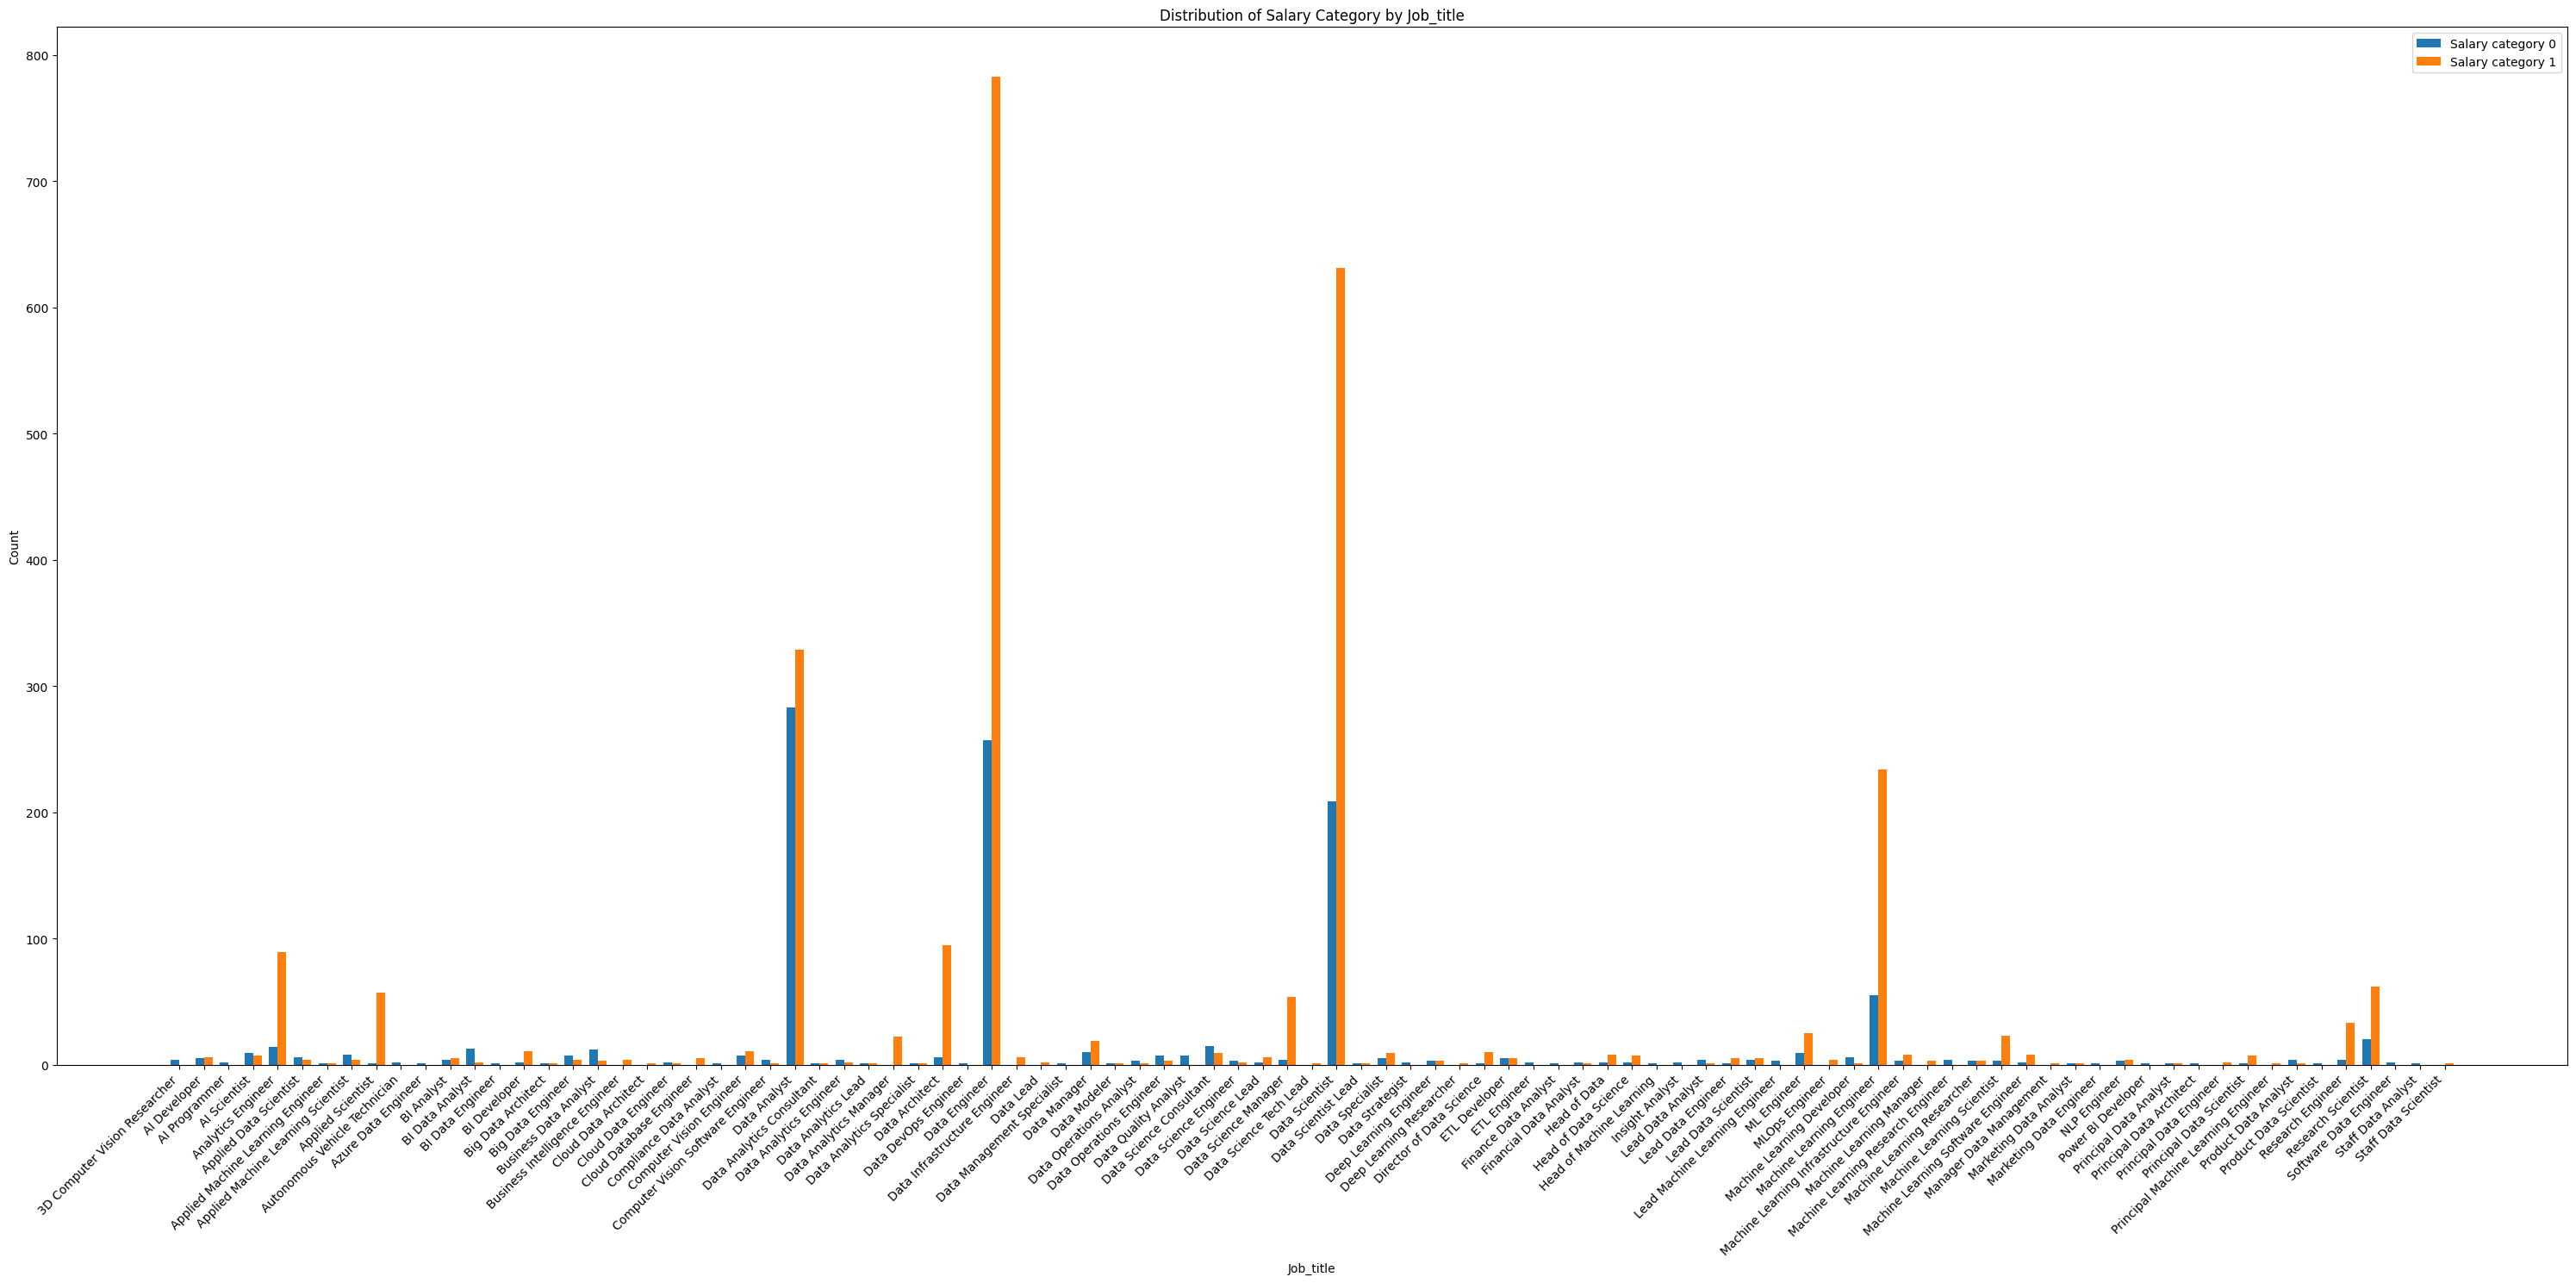

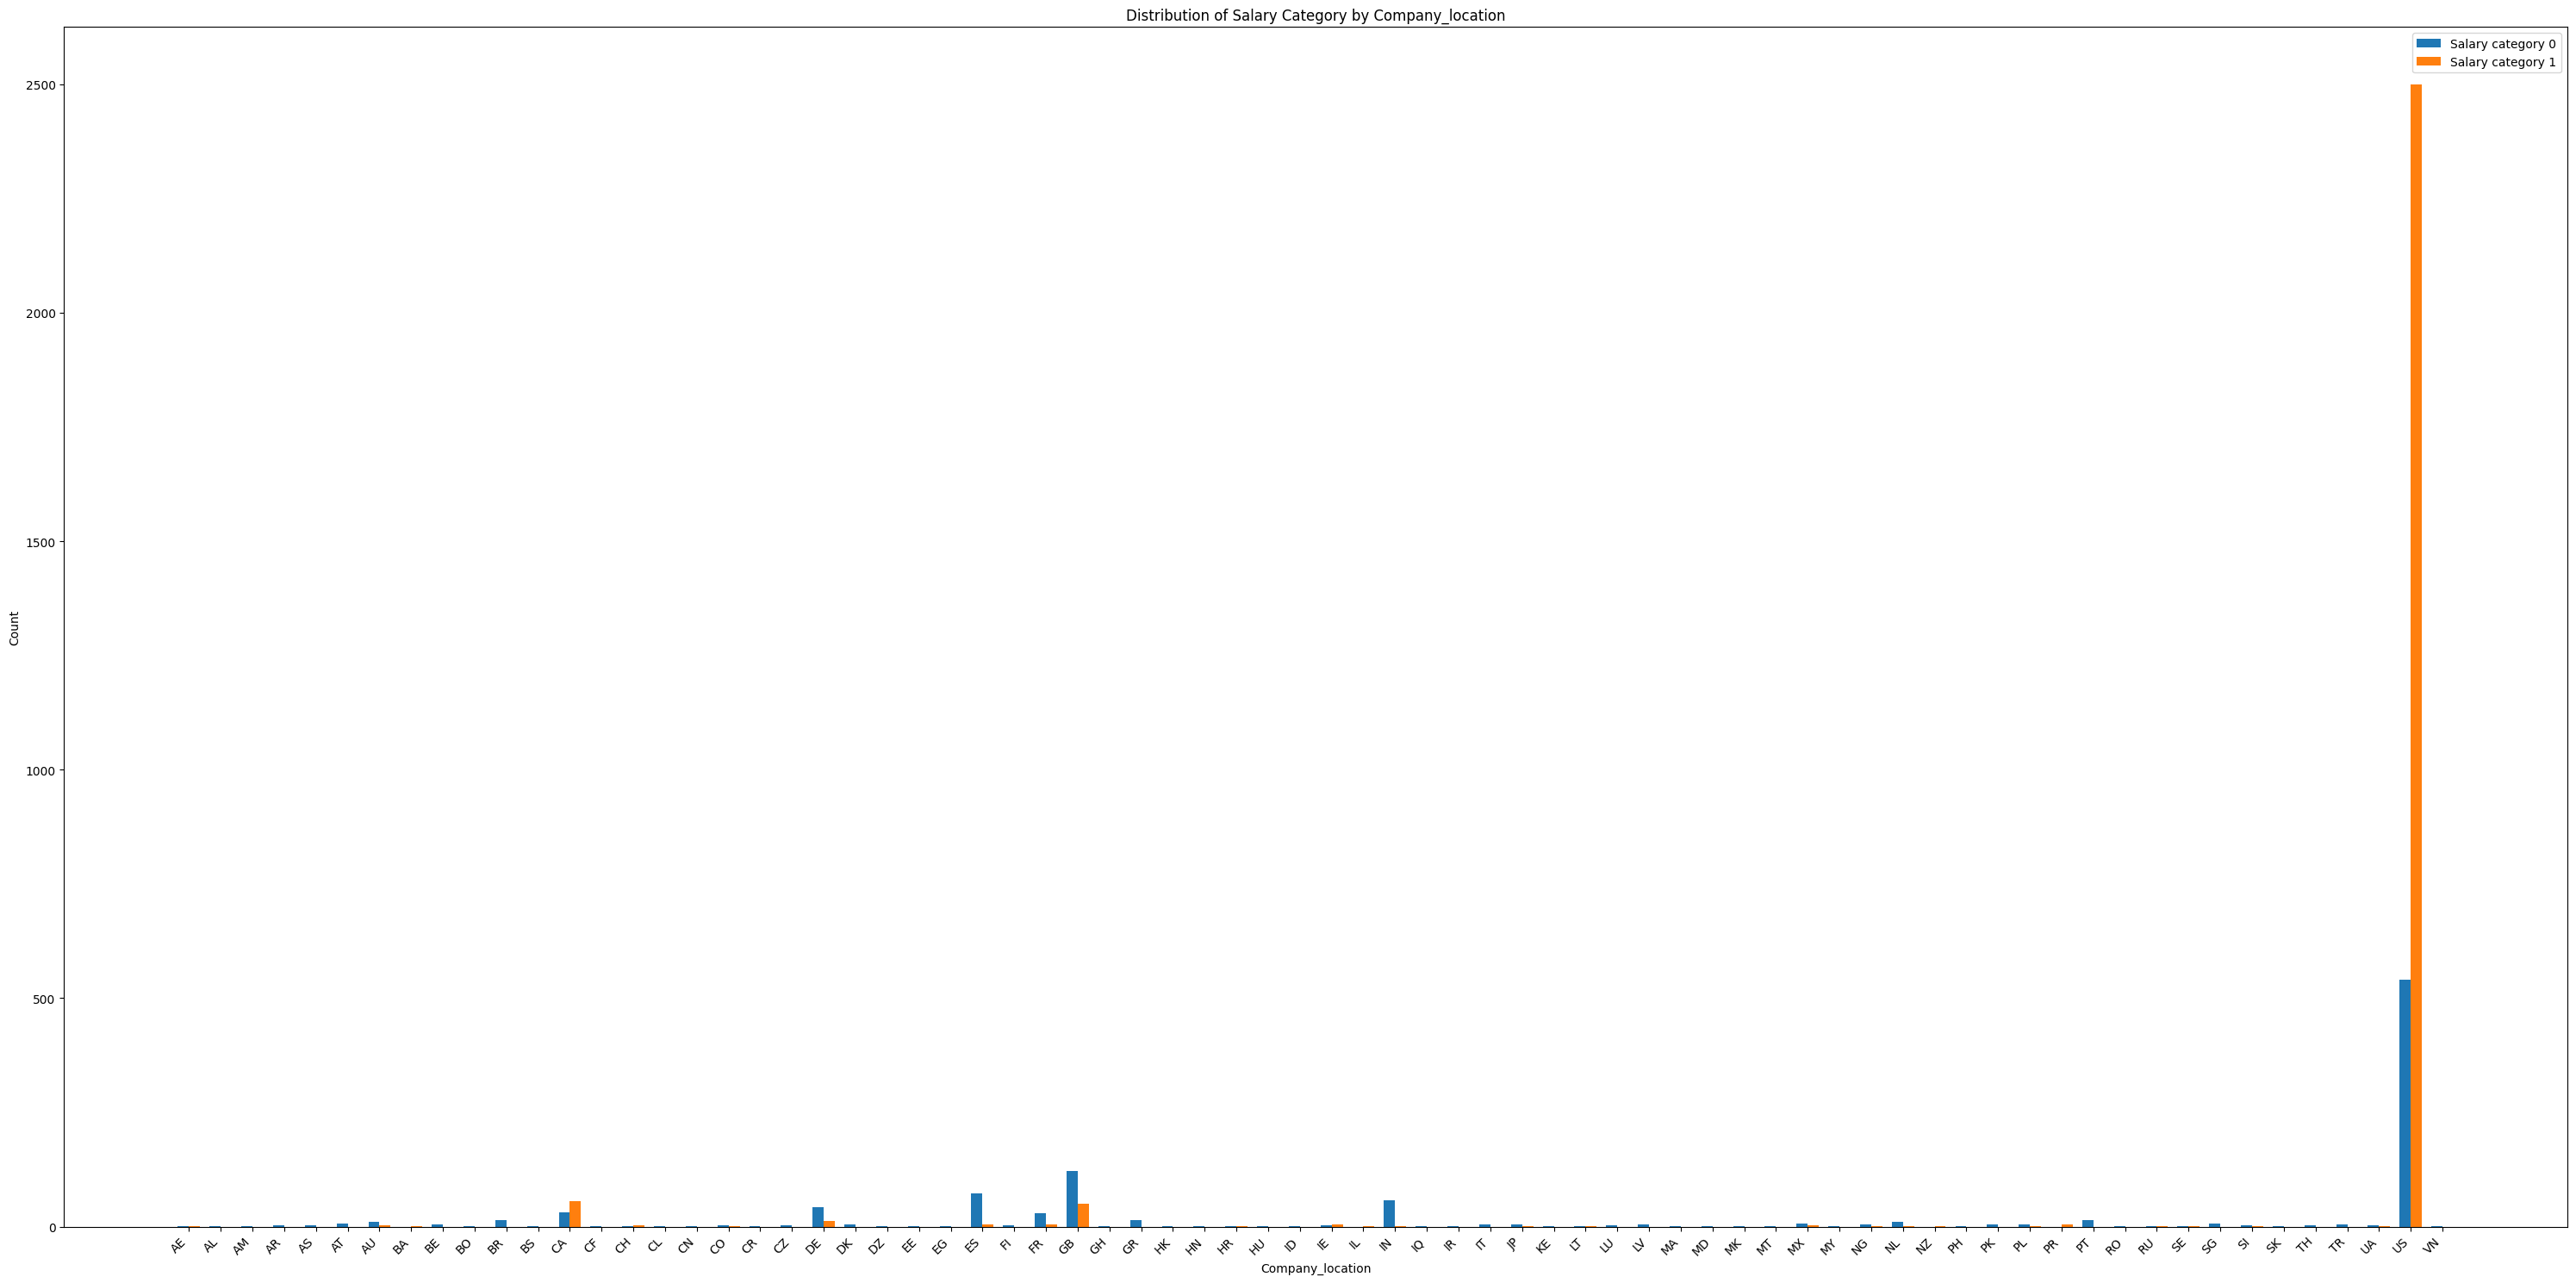

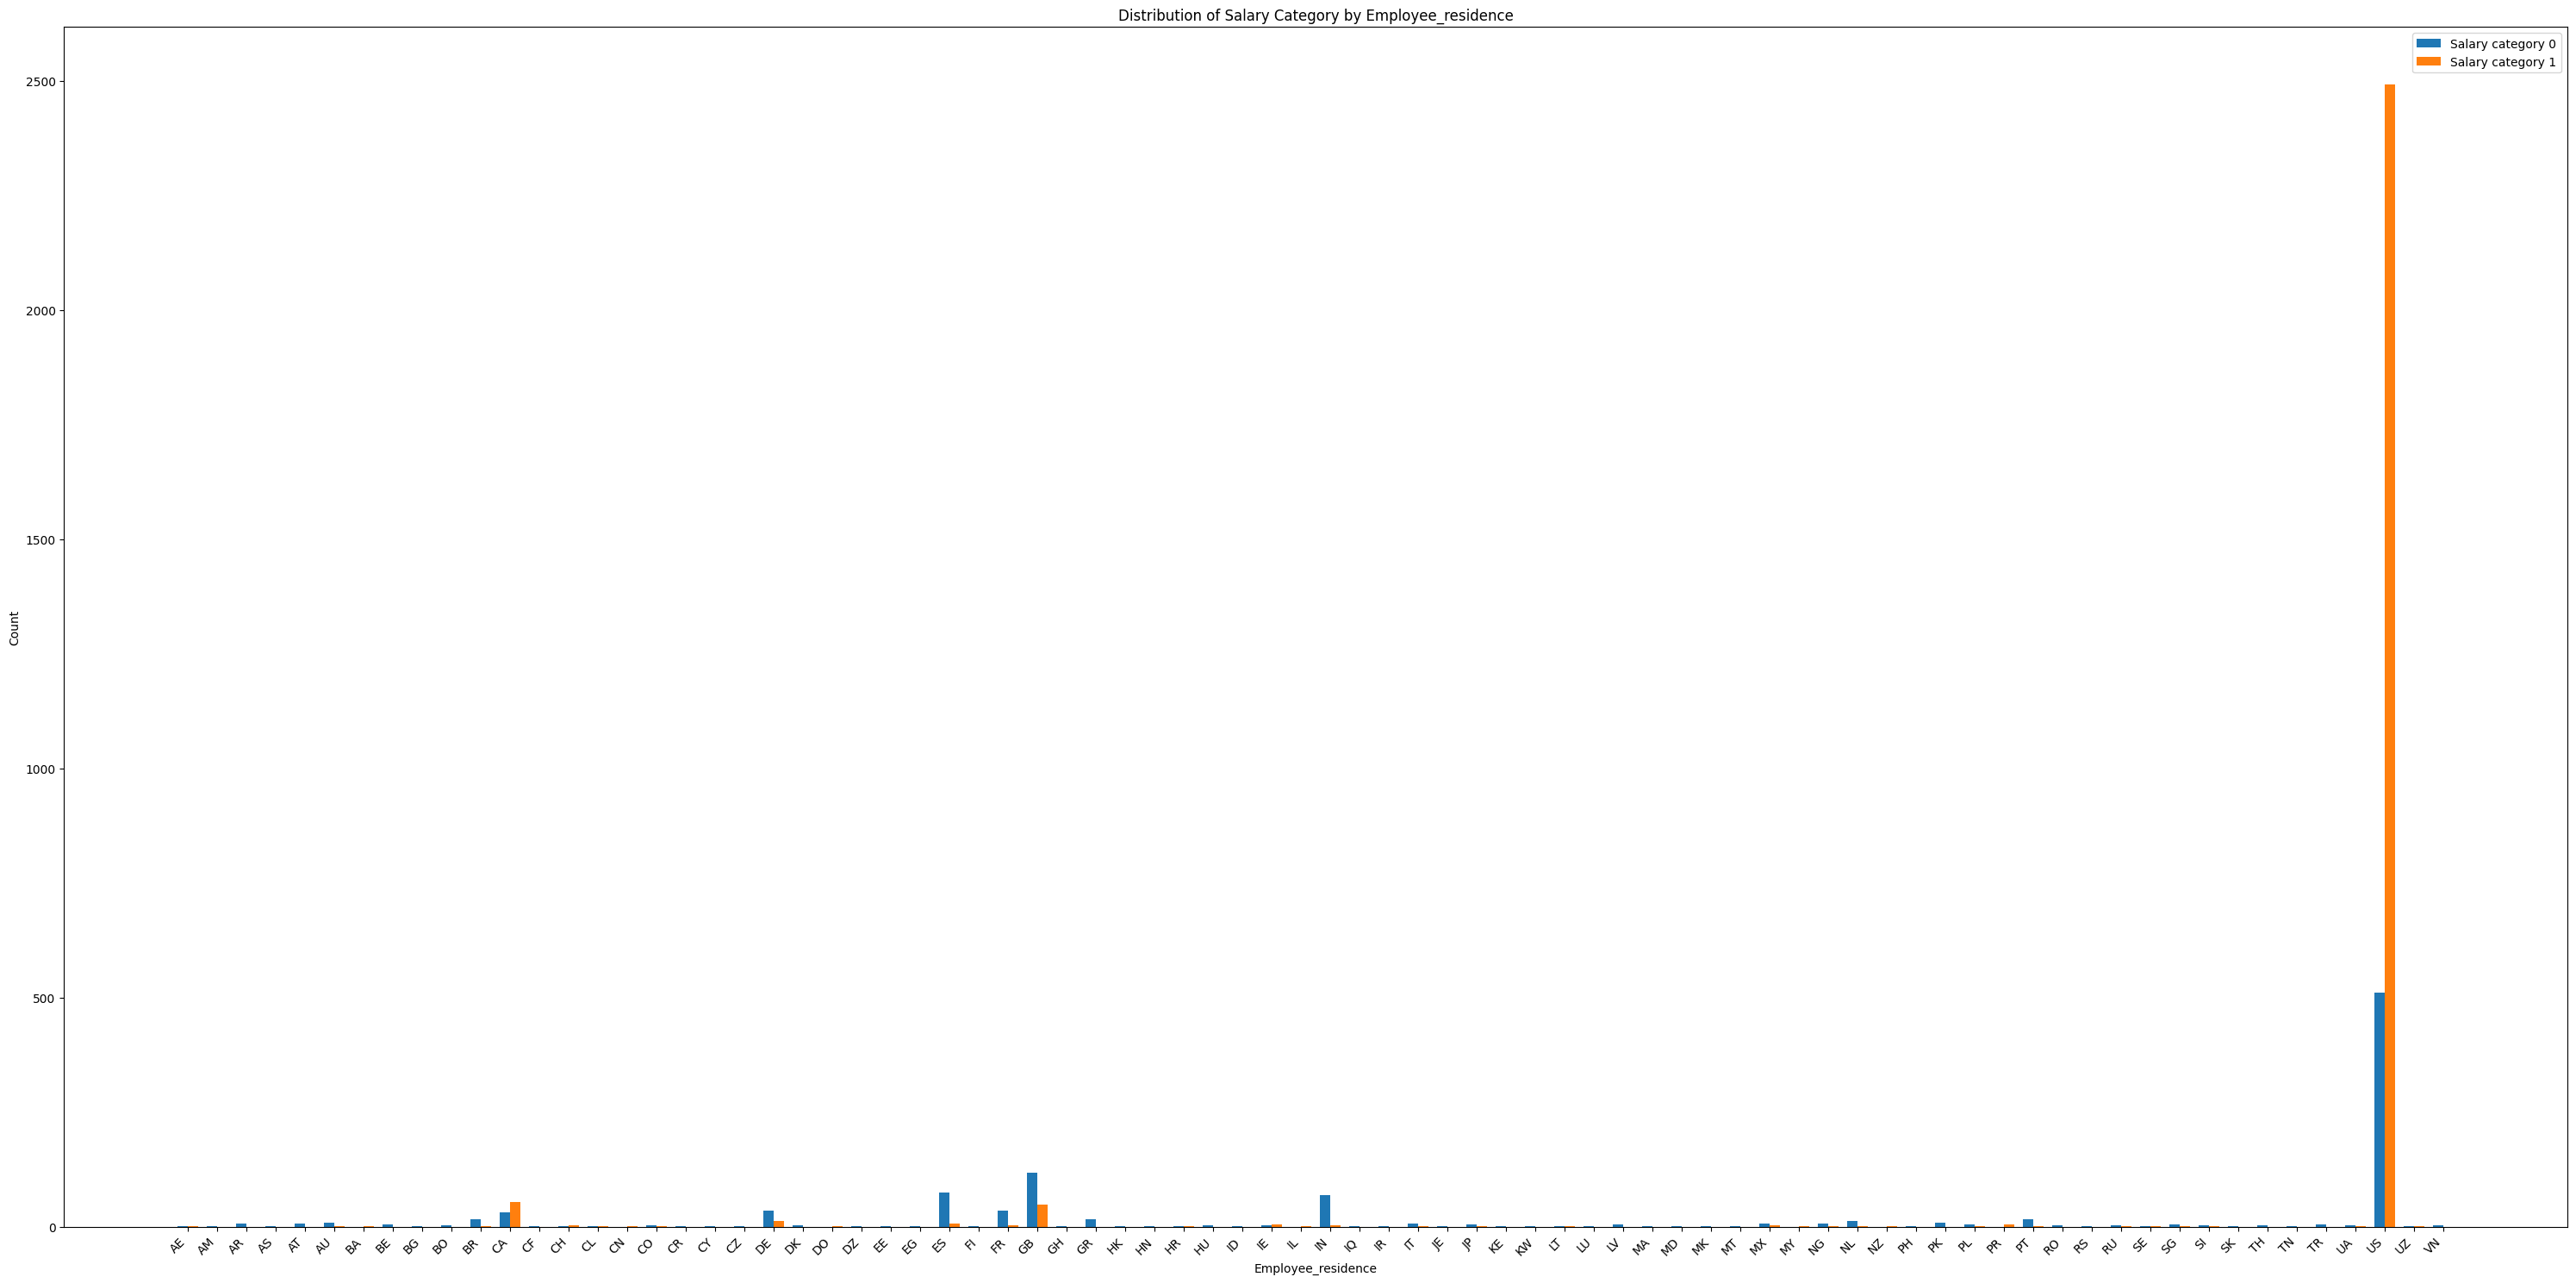

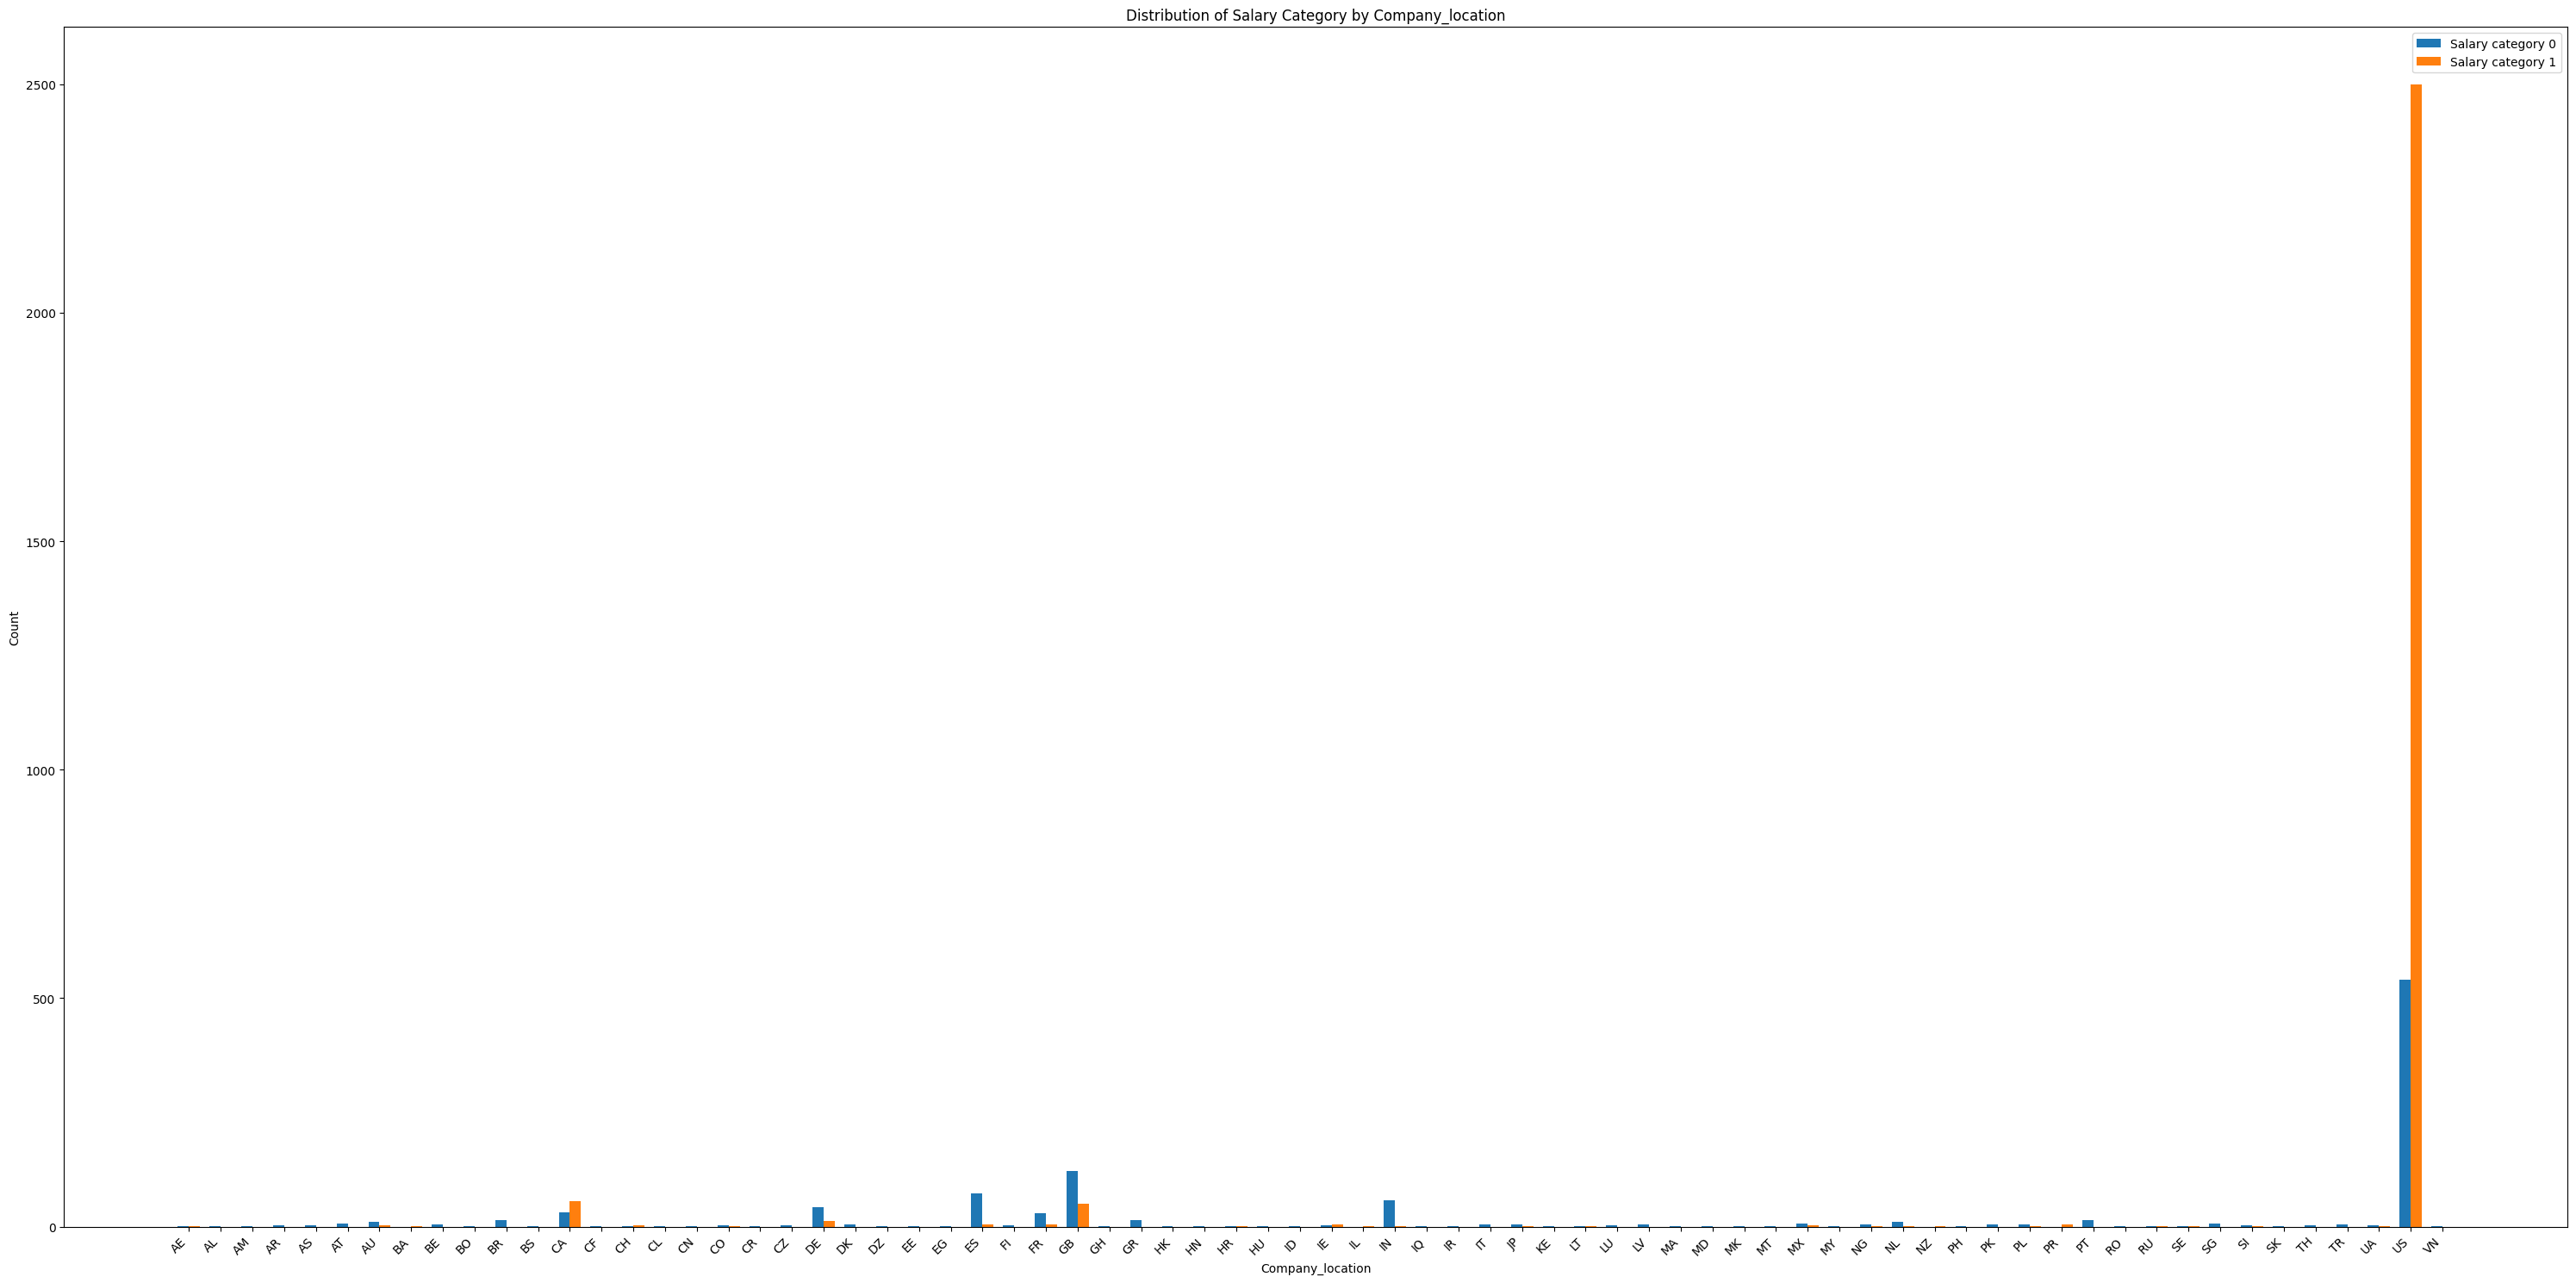

In [ ]:
variables = ['job_title', 'company_location', 'employee_residence', 'company_location']

for variable in variables:
    grouped_df = df.groupby(['salary_category', variable]).size().unstack(fill_value=0)

    counts_0 = grouped_df.loc[0].values
    counts_1 = grouped_df.loc[1].values

    width = 0.35

    xx = np.arange(len(grouped_df.columns))
    plt.figure(figsize=(30, 15))  # Adjust the figure size if needed
    plt.bar(xx - width/2, counts_0, width=width, label="Salary category 0")
    plt.bar(xx + width/2, counts_1, width=width, label="Salary category 1")
    plt.xticks(xx, grouped_df.columns, rotation=45, ha='right')  # Rotate x-tick labels
    plt.xlabel(variable.capitalize())  # Set the x-axis label
    plt.ylabel('Count')  # Set the y-axis label
    plt.title(f'Distribution of Salary Category by {variable.capitalize()}')  # Set the title
    plt.legend()
    plt.tight_layout()
    plt.show()


From the above plots we can clearly see the features are skewed.

# Cramer's V statistic

Cramer's V statistic is based on calculating the $\chi^2$ of categorical features, which evaluates how likely it is that any observed difference between the sets arose by chance. Cramer's V statistic is the normalized version of this measurement and can be calculated as follows:


$$
V = \sqrt{\frac{\chi^2 / n}{\min(k-1, r-1)}}
$$

Where:

* $V$ is Cramer's V statistic.
* $\chi^2$ is the chi-squared statistic calculated from the contingency table.
* $n$ is the total number of observations in the contingency table.
* $k$ is the number of columns (categories) in the contingency table.
* $r$ is the number of rows (categories) in the contingency table.

$\chi^2$ is calculated as follows:

$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

Where:
* $O_i$ is the observed value of the i-th sample.
* $E_i$ is the expected value of the i-th sample.

Before anything, we need to split the train, test and validation sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_copy = df.drop(['salary', 'salary_in_usd', 'salary_currency'], axis=1)

X = df_copy.drop('salary_category', axis=1)
y = df_copy['salary_category']

X_temp , X_test , y_temp , y_test = train_test_split (X,y,test_size = .3 ,shuffle = True , random_state =42)
X_train , X_val , y_train , y_val = train_test_split (X_temp,y_temp,test_size = .2 ,shuffle = True , random_state =42)


print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2102, 8)
y_train shape: (2102,)
X_val shape: (526, 8)
y_val shape: (526,)
X_test shape: (1127, 8)
y_test shape: (1127,)


In [ ]:
def cramers_corrected_stat(confusion_matrix):
    # calculate Cramers V statistic for categorial-categorial association.

    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    if isinstance(confusion_matrix, np.ndarray):
        n = confusion_matrix.sum()
    else:
        n = confusion_matrix.sum().sum()

    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [ ]:
X_train.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

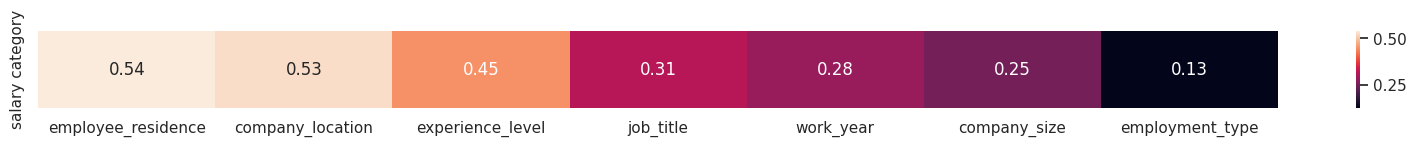

In [ ]:
import scipy.stats as ss
categorical_features = ['employee_residence', 'company_location', 'experience_level', 'job_title', 'work_year', 'company_size', 'employment_type']
cat_corr = []
for col in categorical_features:
    confusion_matrix = pd.crosstab(X_train[col], y_train)
    cat_corr.append(cramers_corrected_stat(confusion_matrix))

cat_corr = pd.DataFrame([cat_corr], columns=categorical_features,index=['salary category']).sort_values(by='salary category', axis=1, ascending=False)
sns.set_theme()
plt.figure(figsize=(20,1))
sns.heatmap(cat_corr, annot=True,fmt='.2f')
plt.show()

We can see there are some useful correlations between our dependent and independent variables. We select the top 3 correlated variables, i.e. "employee_residence", "company_location" and "experience_level".

In [ ]:
X_train = X_train[["employee_residence", "company_location", "experience_level"]]
X_val   = X_val[["employee_residence", "company_location", "experience_level"]]
X_test  = X_test[["employee_residence", "company_location", "experience_level"]]

### SPLIT DATA AND DATA PREPROCESSING

In [ ]:
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()

In [ ]:
emp_resid = encoder1.fit(df['employee_residence'])
comp_loc = encoder2.fit(df['company_location'])
exp = encoder3.fit(df['experience_level'])

X_train['employee_residence'] = emp_resid.transform(X_train['employee_residence'])
X_train['company_location'] = comp_loc.transform(X_train['company_location'])
X_train['experience_level'] = exp.transform(X_train['experience_level'])

X_val['employee_residence'] = emp_resid.transform(X_val['employee_residence'])
X_val['company_location'] = comp_loc.transform(X_val['company_location'])
X_val['experience_level'] = exp.transform(X_val['experience_level'])

X_test['employee_residence'] = emp_resid.transform(X_test['employee_residence'])
X_test['company_location'] = comp_loc.transform(X_test['company_location'])
X_test['experience_level'] = exp.transform(X_test['experience_level'])

In [ ]:
X_train.head()

,employee_residence,company_location,experience_level
2248,75,70,3
1439,75,70,3
2748,75,70,3
2542,75,70,3
3364,75,70,3


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler  = StandardScaler()
scaler  = scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.46040631,  0.45268136,  0.58424434],
       [ 0.46040631,  0.45268136,  0.58424434],
       [ 0.46040631,  0.45268136,  0.58424434],
       ...,
       [ 0.46040631,  0.45268136,  0.58424434],
       [ 0.46040631,  0.45268136,  0.58424434],
       [ 0.46040631,  0.45268136, -0.51816285]])

### GAUSSIANNB MODEL

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [ ]:
gn_model=GaussianNB()
gn_time1 = time.time()
gn_model.fit(X_train,y_train)
gn_time2 = time.time()

gn_training_time = gn_time2 - gn_time1

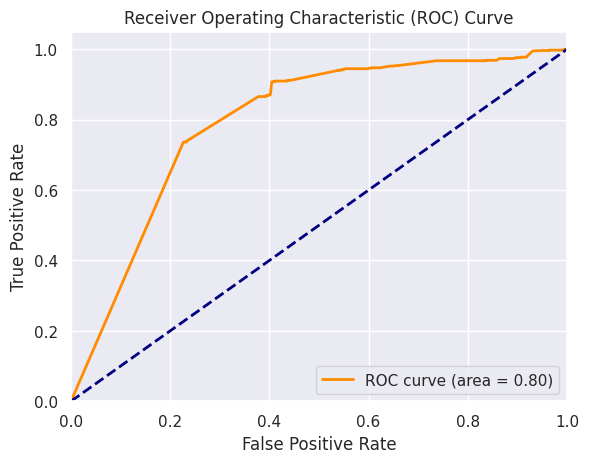

Time to train Gaussian Naive Bayes model: 0.0035429000854492188 seconds
Time to test Gaussian Naive Bayes model: 0.0018949508666992188 seconds
Confusion Matrix:


<Axes: >

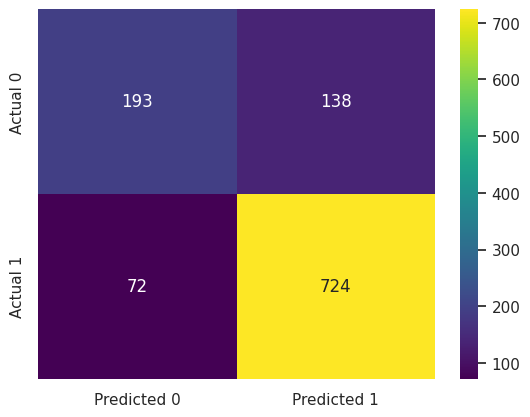

In [ ]:
gn_test_time1 = time.time()
y_pred_proba = gn_model.predict_proba(X_test)[:, 1]
gn_test_time2 = time.time()

gn_test_time = gn_test_time2 - gn_test_time1

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute confusion matrix
y_pred = gn_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

conf_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print(f"Time to train Gaussian Naive Bayes model: {gn_training_time} seconds")
print(f"Time to test Gaussian Naive Bayes model: {gn_test_time} seconds")

print("Confusion Matrix:")
sns.heatmap(conf_df, annot=True, fmt='d', cmap='viridis', cbar=True)


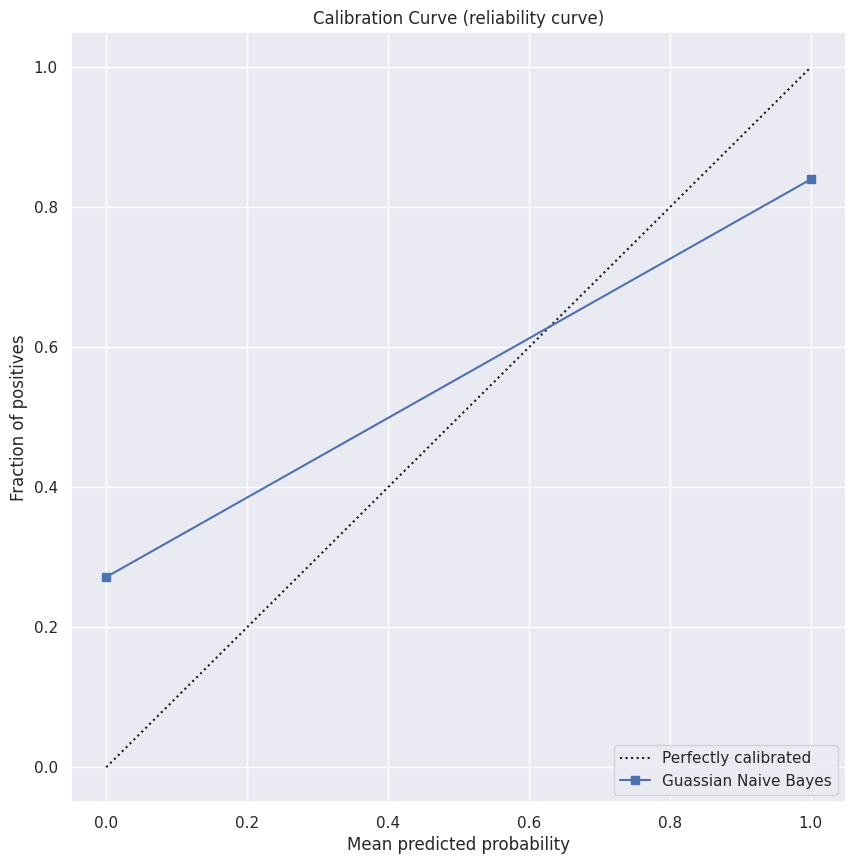

In [ ]:
from sklearn.calibration import calibration_curve

proba = gn_model.predict_proba(X_test)
proba_1d = np.argmax(proba, axis=1)
# Plot calibration curve for each class separately
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, proba_1d, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Guassian Naive Bayes")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title('Calibration Curve (reliability curve)')
plt.legend(loc="lower right")
plt.show()


# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import cross_val_score

# Define a range of K values to try
k_values = list(range(1, 17))

# Dictionary to store mean cross-validation scores for each K
cv_scores = {}

# Performing cross-validation for each K
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5)  # 5-fold cross-validation
    cv_scores[k] = np.mean(scores)

# Find the best K based on cross-validation scores
best_k = max(cv_scores, key=cv_scores.get)
best_score = cv_scores[best_k]

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_time1 = time.time()
knn_model.fit(X_train, y_train)
knn_time2 = time.time()

knn_train_time = knn_time2 - knn_time1
print("Cross-Validation Scores:")
for k, score in cv_scores.items():
    print("K =", k, ": Mean Accuracy =", score)

print("\nBest K based on Cross-Validation:", best_k)
print("Mean Accuracy for Best K:", best_score)


Cross-Validation Scores:
K = 1 : Mean Accuracy = 0.8073193077706142
K = 2 : Mean Accuracy = 0.7878203823096934
K = 3 : Mean Accuracy = 0.80683519963805
K = 4 : Mean Accuracy = 0.7047053500735212
K = 5 : Mean Accuracy = 0.727056894016514
K = 6 : Mean Accuracy = 0.7327655242619613
K = 7 : Mean Accuracy = 0.730387965162312
K = 8 : Mean Accuracy = 0.7327632620744259
K = 9 : Mean Accuracy = 0.7318120122158127
K = 10 : Mean Accuracy = 0.7322882026920032
K = 11 : Mean Accuracy = 0.7337167741205747
K = 12 : Mean Accuracy = 0.7332405836443842
K = 13 : Mean Accuracy = 0.7341940956905327
K = 14 : Mean Accuracy = 0.7318131433095804
K = 15 : Mean Accuracy = 0.8225506164461034
K = 16 : Mean Accuracy = 0.8234996041171814

Best K based on Cross-Validation: 16
Mean Accuracy for Best K: 0.8234996041171814


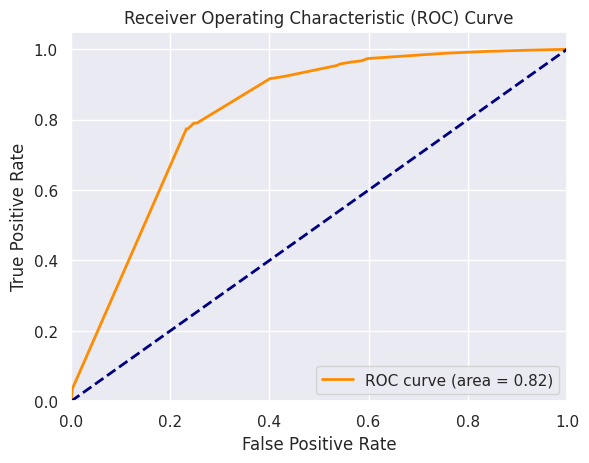

Time to train the KNN model for K = 16: 0.0018444061279296875 seconds
Time to test the KNN model for K = 16: 0.01655864715576172 seconds
Confusion Matrix:


<Axes: >

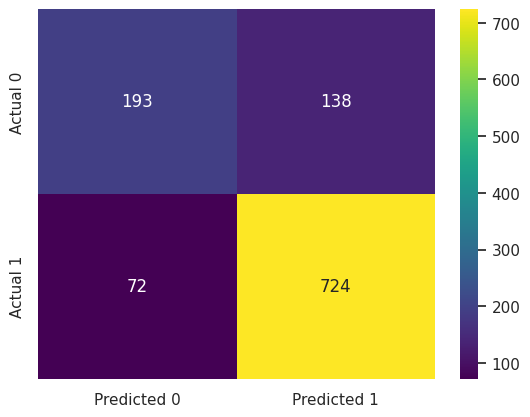

In [ ]:
knn_test_time1 = time.time()
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]
knn_test_time2 = time.time()

knn_test_time = knn_test_time2 - knn_test_time1

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print(f"Time to train the KNN model for K = {best_k}: {knn_train_time} seconds")
print(f"Time to test the KNN model for K = {best_k}: {knn_test_time} seconds")

print("Confusion Matrix:")
sns.heatmap(conf_df, annot=True, fmt='d', cmap='viridis', cbar=True)


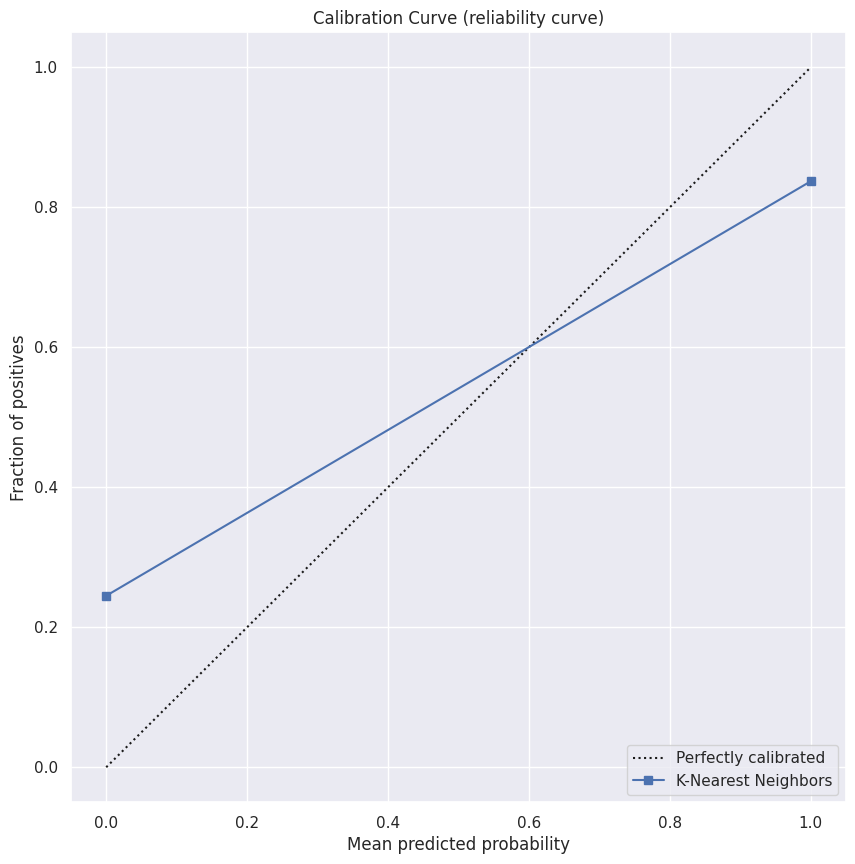

In [ ]:
proba = knn_model.predict_proba(X_test)
proba_1d = np.argmax(proba, axis=1)
# Plot calibration curve for each class separately
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, proba_1d, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="K-Nearest Neighbors")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title('Calibration Curve (reliability curve)')
plt.legend(loc="lower right")
plt.show()

# AdaBoost

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



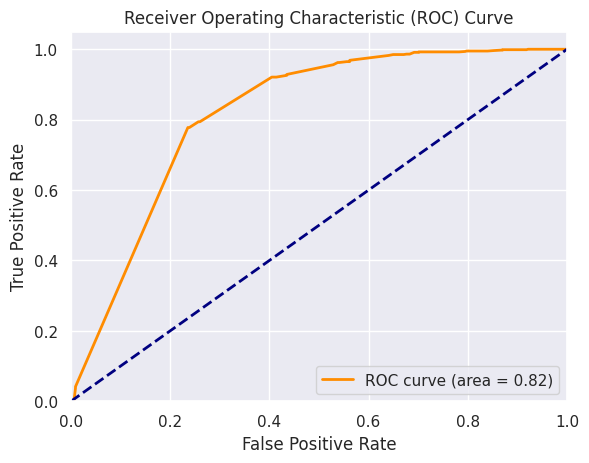

Time to train the AdaBoost model: 0.4394845962524414 seconds
Time to test the AdaBoost model: 0.04527163505554199 seconds
Confusion Matrix:


<Axes: >

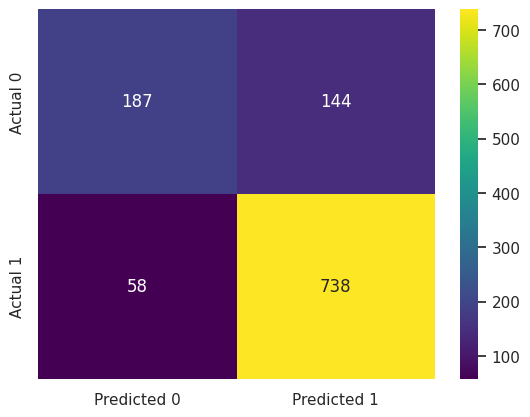

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth=1)  # Decision stump
adaboost_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=150, random_state=42)

ab_train_time1 = time.time()
adaboost_clf.fit(X_train, y_train)
ab_train_time2 = time.time()

ab_train_time = ab_train_time2 - ab_train_time1

y_pred_proba = adaboost_clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


ab_test_time1 = time.time()
y_pred = adaboost_clf.predict(X_test)
ab_test_time2 = time.time()

ab_test_time = ab_test_time2 - ab_test_time1

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

conf_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print(f"Time to train the AdaBoost model: {ab_train_time} seconds")
print(f"Time to test the AdaBoost model: {ab_test_time} seconds")

print("Confusion Matrix:")
sns.heatmap(conf_df, annot=True, fmt='d', cmap='viridis', cbar=True)


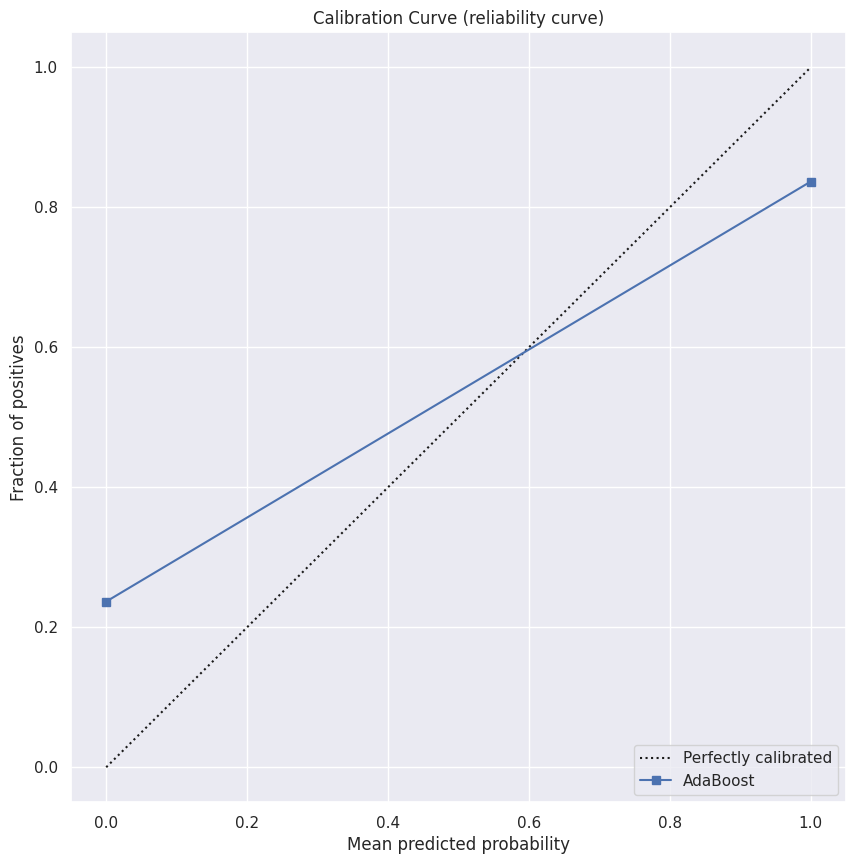

In [ ]:
proba = adaboost_clf.predict_proba(X_test)
proba_1d = np.argmax(proba, axis=1)
# Plot calibration curve for each class separately
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, proba_1d, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="AdaBoost")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title('Calibration Curve (reliability curve)')
plt.legend(loc="lower right")
plt.show()

# ROC and Calibration curves in one plot

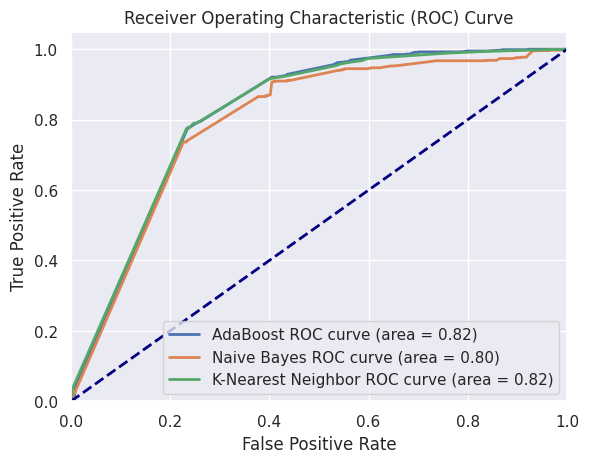

In [ ]:
proba_ada = adaboost_clf.predict_proba(X_test)[:, 1]
proba_nb = gn_model.predict_proba(X_test)[:,1]
proba_knn = knn_model.predict_proba(X_test)[:,1]

fpr1, tpr1, _ = roc_curve(y_test, proba_ada)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, proba_nb)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, proba_knn)
roc_auc3 = auc(fpr3, tpr3)

plt.figure()
plt.plot(fpr1, tpr1, lw=2, label='AdaBoost ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, lw=2, label='Naive Bayes ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, lw=2, label='K-Nearest Neighbor ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

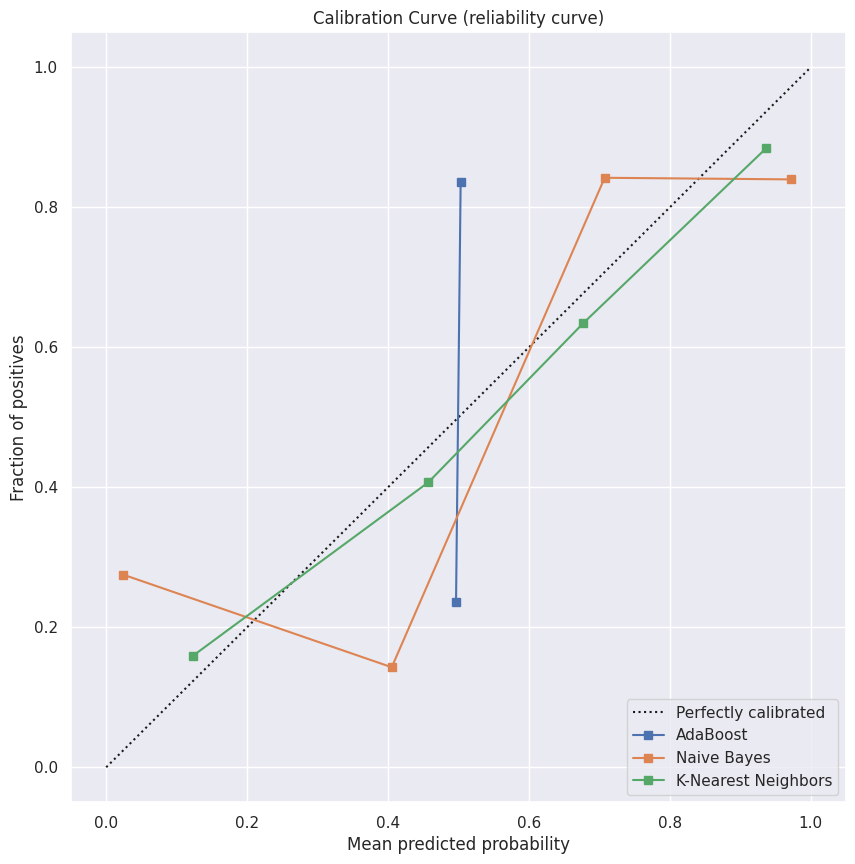

In [ ]:
proba_ada = adaboost_clf.predict_proba(X_test)[:,1]
proba_nb = gn_model.predict_proba(X_test)[:,1]
proba_knn = knn_model.predict_proba(X_test)[:,1]

y1, x1 = calibration_curve(y_test, proba_ada, n_bins=4)
y2, x2 = calibration_curve(y_test, proba_nb, n_bins=4)
y3, x3 = calibration_curve(y_test, proba_knn, n_bins=4)

# Plot calibration curve for each class separately
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.plot(x1, y1, "s-", label="AdaBoost")
plt.plot(x2, y2, "s-", label="Naive Bayes")
plt.plot(x3, y3, "s-", label="K-Nearest Neighbors")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title('Calibration Curve (reliability curve)')
plt.legend(loc="lower right")
plt.show()